In [1]:
#IMPORTING ALL THE NECESSARY PACKAGES.
import matplotlib.pyplot as plt                                                 #Importing matplotlib to plot and analyse data.
import pandas as pd
import numpy as np
import plotly.express as px                                                  
from prophet import Prophet   

In [2]:
df=pd.read_csv("E:\HoaPhatdataset (2).csv")

In [3]:
# Convert the 'date' column to a datetime data type
df['date']=pd.to_datetime(df.date,format='%m/%d/%Y')
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['date'].values))
df.head()

,date,price,Open,High,Low,Vol.,Change %
2015-09-07,2015-09-07,3861.9,3888.4,3941.3,3848.7,6.33M,-1.69%
2015-09-08,2015-09-08,3994.2,3875.2,3994.2,3861.9,5.76M,3.43%
2015-09-09,2015-09-09,4060.3,4047.1,4073.5,4007.4,10.08M,1.65%
2015-09-10,2015-09-10,4020.6,4007.4,4060.3,3967.7,4.93M,-0.98%
2015-09-11,2015-09-11,3928.1,4007.4,4020.6,3928.1,6.22M,-2.30%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1812 entries, 2015-09-07 to 2022-11-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1812 non-null   datetime64[ns]
 1   price     1812 non-null   float64       
 2   Open      1812 non-null   float64       
 3   High      1812 non-null   float64       
 4   Low       1812 non-null   float64       
 5   Vol.      1812 non-null   object        
 6   Change %  1812 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 113.2+ KB


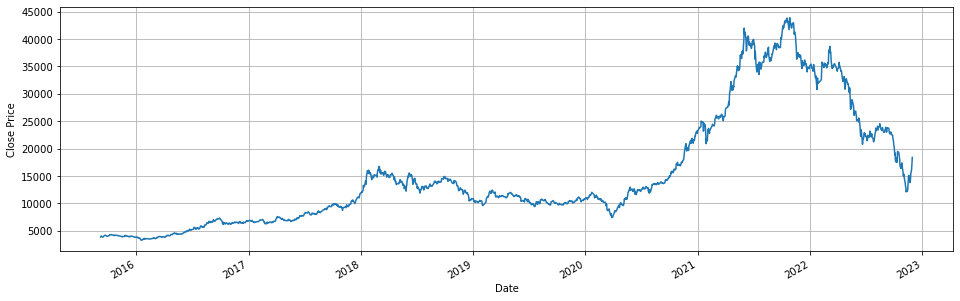

In [5]:
#Visualise the past 5 year's price of BTC
plt.xlabel('Date')
plt.ylabel('Close Price')
df['price'].plot(figsize=(16,5))
plt.grid()

In [6]:
df[['ds','y']] = df[['date','price']]                       #preparing expected column names
df

,date,price,Open,High,Low,Vol.,Change %,ds,y
2015-09-07,2015-09-07,3861.9,3888.4,3941.3,3848.7,6.33M,-1.69%,2015-09-07,3861.9
2015-09-08,2015-09-08,3994.2,3875.2,3994.2,3861.9,5.76M,3.43%,2015-09-08,3994.2
2015-09-09,2015-09-09,4060.3,4047.1,4073.5,4007.4,10.08M,1.65%,2015-09-09,4060.3
2015-09-10,2015-09-10,4020.6,4007.4,4060.3,3967.7,4.93M,-0.98%,2015-09-10,4020.6
2015-09-11,2015-09-11,3928.1,4007.4,4020.6,3928.1,6.22M,-2.30%,2015-09-11,3928.1
...,...,...,...,...,...,...,...,...,...
2022-11-24,2022-11-24,14350.0,13700.0,14400.0,13600.0,31.12M,3.99%,2022-11-24,14350.0
2022-11-25,2022-11-25,15300.0,14600.0,15300.0,14350.0,26.53M,6.62%,2022-11-25,15300.0
2022-11-28,2022-11-28,16350.0,15600.0,16350.0,15600.0,58.84M,6.86%,2022-11-28,16350.0
2022-11-29,2022-11-29,17400.0,16600.0,17450.0,16350.0,64.31M,6.42%,2022-11-29,17400.0


In [14]:
#Training and Evaluating our Model
train_data = df.sample(frac=0.7, random_state=0)
test_data = df.drop(train_data.index)

In [15]:
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (1268, 9)
testing data size : (544, 9)


In [16]:
from sklearn.metrics import mean_absolute_error
model = Prophet(daily_seasonality=True)
model.fit(train_data)
prediction = model.predict(pd.DataFrame({'ds':test_data['ds']}))
y_actual = test_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

21:33:00 - cmdstanpy - INFO - Chain [1] start processing
21:33:00 - cmdstanpy - INFO - Chain [1] done processing


1286.9029411764704

In [17]:
#import the facebbook prophet plotting libraries
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt
#Visualize the predicted and the actual values.
plt.figure(figsize=(16,5))
plot_plotly(model,prediction)

<Figure size 1152x360 with 0 Axes>

In [18]:
#Price action Prediction
model = Prophet()                                                               #creating an instant of prophet class in model.
model.fit(df)#fitting data_frame to the model.
future = model.make_future_dataframe(15)                                       #making future dataframe for 365 days and storing the date values in future.
forecast = model.predict(future) 

21:33:01 - cmdstanpy - INFO - Chain [1] start processing
21:33:01 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
#plot the data
plot_plotly(model,forecast)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
#Test data
mae = mean_absolute_error(y_actual, y_predicted)
mape = mean_absolute_percentage_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_predicted)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 1286.90
MAPE: 9.40%
MSE: 3408301.59
RMSE: 1846.16
R2: 0.97
